# Support Vector Machines
## Excerscise H8.2 C-SVM with std.  parameters

In [1]:
% matplotlib inline

import numpy as np
import scipy as sp
import math
import scipy.stats as scp
import matplotlib as mpl
from numpy import linalg as la
from numpy import random as rand
from matplotlib import pyplot as plt
from sklearn import svm

In [2]:
def create_data(N):
    n = N/2
    n1 = (np.sign(rand.uniform(-1, 1, n))==1).sum()
    n2 = (np.sign(rand.uniform(-1, 1, n))==1).sum()

    X_c1 = np.append(rand.multivariate_normal([0,1], [[0.1, 0], [0, 0.1]], n1), rand.multivariate_normal([1,0], [[0.1, 0], [0, 0.1]], n-n1), axis=0)
    X_c2 = np.append(rand.multivariate_normal([0,0], [[0.1, 0], [0, 0.1]], n2), rand.multivariate_normal([1,1], [[0.1, 0], [0, 0.1]], n-n2), axis=0)
    # create a data matrix of shape 120x3 where colums 0 and 1 are the dimensions and colum 2 being the label
    p = np.vstack((X_c1, X_c2))
    #print p.shape
    y = np.vstack((np.zeros((n,1)), np.ones((n,1))))

    return p,y

In [3]:
def plot_data(X,y):
    N = len(X[:,0])
    n = N/2
    plt.scatter(X[0:n,0], X[0:n,1], color ='red')
    plt.scatter(X[n+1:N,0], X[n+1:N,1], color='black')

In [35]:
def grid_plot_svm (X,y,grid_size,r1,r2,plot_test=False, Xt=0, yt=0):
    # create a grid for the contour plot
    ran = np.linspace(r1, r2, grid_size)
    GX, GY = np.meshgrid(ran, ran)
    classes = np.zeros((grid_size, grid_size))
    c_svm = svm.SVC()
    c_svm.fit(X,y)

    # go through grid and compute the assigned class
    for gx in range(grid_size):
        for gy in range(grid_size):
            loc = np.vstack((ran[gx],ran[gy])).T
            classes[gx,gy] = c_svm.predict(loc)


    plt.figure()
    plt.contourf(GX, GY, classes[:,:].T, levels=[-1.0,0.,1.0])
    if(plot_test):
        N = len(Xt[:,0])
        n = N/2
        plt.scatter(Xt[0:n,0], Xt[0:n,1], color ='red')
        plt.scatter(Xt[n+1:N,0], Xt[n+1:N,1], color='black')
    else:
        N = len(X[:,0])
        n = N/2
        plt.scatter(X[0:n,0], X[0:n,1], color ='red')
        plt.scatter(X[n+1:N,0], X[n+1:N,1], color='black')
    
    plt.show()

In [5]:
def loss_error(y,y_pred):
    right = 0
    y_pred.flatten()
    y.flatten()
    for i in range(0,len(y_pred)):
        if (y_pred[i] == y[i]):
            right = right +1
        
    return(float(right)/len(y_pred)) * 100

#  Exercise H8.2: C-SVM with standard parameters
In this exercise, we use C-SVMs to solve the “XOR”-classification problem from exercise sheet 6. To this end (1) first create a training set of 80 data as described in exercise H6.1 and (2) create a test set of 80 data from the same distribution.

Next, use your chosen SVM implementation to train a C-SVM with RBF kernel and the soft- ware’s standard parameters. Classify the test data and report the classification error quantified by the 0/1 loss function (percentage of wrong predictions). Visualize the results as in exercise H6.2: plot the training patterns and the decision boundary (e.g. with a contour plot) in input space.

This model uses  53 Support Vectors. It missclassification rate is:
13.75

 Plotted with test Data


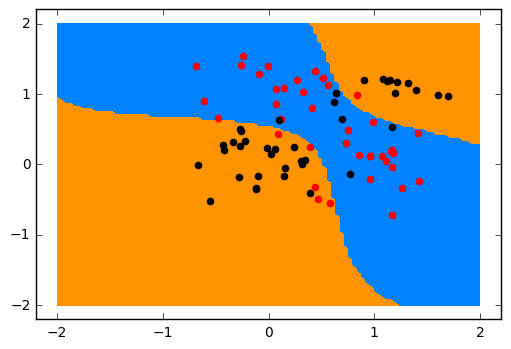


 Plotted with training Data


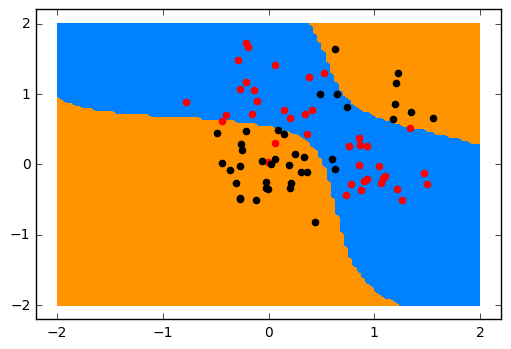

In [38]:
X_train,y_train = create_data(80)
X_test,y_test = create_data(80)

# train svm
c_svm = svm.SVC()
c_svm.fit(X_train,y_train)
print "This model uses ",c_svm.support_vectors_.shape[0], "Support Vectors. It missclassification rate is:"
#predict test data
y_pred = c_svm.predict(X_test)

# calculate classification error
error = loss_error(y_test,y_pred)
print 100-error

print "\n Plotted with test Data"
grid_plot_svm(X_train,y_train,100,-2,2,True, X_test,y_test)
print "\n Plotted with training Data"
grid_plot_svm(X_train,y_train,100,-2,2)

# Exercise H8.3: C-SVM parameter optimization

## (a) (2 points) Use cross-validation and grid-search to determine good values for C and the kernel parameter γ. 

Follow the procedure described in the guide: 
Define the grid us- ing exponentially growing sequences of C and γ, e.g. C ∈ {2−6, 2−4, . . . , 210}, γ ∈ {2−5, 2−3, . . . , 29}. 

Make sure you only use the training data in this step. 
Plot the mean training-set classification rate and cross-validation performance as a function of C and γ (e.g. using contour plots as in figure 2 of the guide).

In [12]:
from sklearn.model_selection import cross_val_score

In [50]:
 def grid_plot_svm_2 (X,y,grid_size,r1,r2,l,c, use_own=False, title=''):
    # create a grid for the contour plot
    ran = np.linspace(r1, r2, grid_size)
    GX, GY = np.meshgrid(ran, ran)
    classes = np.zeros((grid_size, grid_size))
    if(use_own):
        c_svm = svm.SVC(C=c,gamma=l)
    else:
        c_svm = svm.SVC()
    c_svm.fit(X,y)

    # go through grid and compute the assigned class
    for gx in range(grid_size):
        for gy in range(grid_size):
            loc = np.vstack((ran[gx],ran[gy])).T
            classes[gx,gy] = c_svm.predict(loc)

    print "This model uses ",c_svm.support_vectors_.shape[0], "Support Vectors."
    
    plt.figure()
    plt.contourf(GX, GY, classes[:,:].T, levels=[-1.0,0.,1.0])
    N = len(X[:,0])
    n = N/2
    plt.scatter(X[0:n,0], X[0:n,1], color ='red')
    plt.scatter(X[n+1:N,0], X[n+1:N,1], color='black')
    plt.title(title)



In [51]:
def cross_valid(X, y, c, g, n_folds=10):
    '''
    Synopsis:
        w_opt, b_opt, lambda_opt = cross_validation(X, Y, L, n_folds=10)
    Arguments:
        X:            2D array of data (features x samples)
        Y:            Vector of true labels (1 x samples)
        L:            List of lambdas to cross validate (1 x #lambdas)
        n_folds:      Number of nested folds
    Output:
        w_opt:        optimal weight vector
        b_opt:        optimal bias
        lambda_opt:   the lambda with the lowest MSE
    '''
    X = X.T
    y = y.T
    d, n = X.shape
    samples_per_fold = int(float(n)/ float(n_folds))

    rates = np.empty(n_folds)
    idx = np.arange(n) # np.random.permutation(n) # np.arange(n)
    for j in range(n_folds):
        # extract one fold for testing
        idx_te = idx[j*samples_per_fold:(j+1)*samples_per_fold]
        # get the train data
        X_tr = np.delete(X, idx_te, axis=1)
        y_tr = np.delete(y, idx_te, axis=1)
        # get the test data
        X_te = X[:,idx_te]
        y_te = y[:,idx_te]

        
        # train the model
        c_svm = svm.SVC(C=c,gamma=g)
        c_svm.fit(X_tr.T,y_tr.T)
        # predict the label
        y_pred = c_svm.predict(X_te.T)
        
        rates[j] = float(loss_error(y_te.T,y_pred))
    
    return np.min(rates)

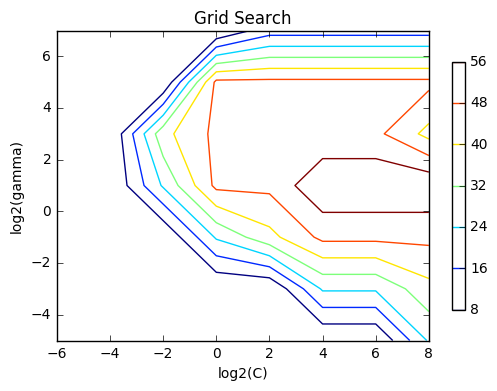

This model uses  28 Support Vectors.
This model uses  38 Support Vectors.


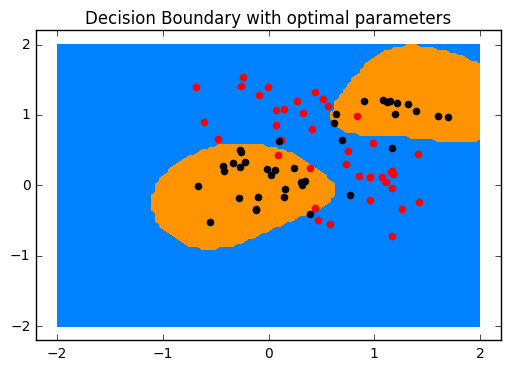

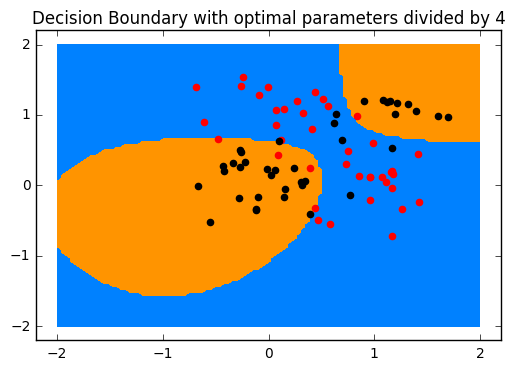

In [53]:
X_train,y_train = create_data(80)
C = 2.**np.arange(-6,10,2)
G = 2.**np.arange(-5,9,2)

rates = np.zeros((C.shape[0],G.shape[0]))
best_c = 0
best_g = 0
best_rate = 0
for i,c in enumerate(C):
    for j,g in enumerate(G):
        rates[i,j] = cross_valid(X_train,y_train,c,g)
        if (rates[i,j] > best_rate):
            best_rate = rates[i,j];
            best_c = c
            best_g = g
            
        
CS = plt.contour(np.log2(C),np.log2(G),rates.T)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.xlabel('log2(C)')
plt.ylabel('log2(gamma)')
plt.title('Grid Search')
plt.show()

grid_plot_svm_2(X_test,y_test,100,-2,2,best_g,best_c,True,"Decision Boundary with optimal parameters")

grid_plot_svm_2(X_test,y_test,100,-2,2,float(best_g)/float(4),float(best_c)/float(4),True,"Decision Boundary with optimal parameters divided by 4")




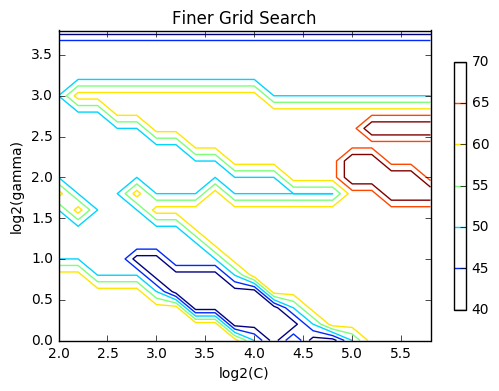

In [39]:
C2 = 2.**np.arange(2,6,0.2)
G2 = 2.**np.arange(0,4,0.2)

rates2 = np.zeros((C2.shape[0],G2.shape[0]))
best_c2 = 0
best_g2 = 0
best_rate2 = 0
for k,c2 in enumerate(C2):
    for l,g2 in enumerate(G2):
        rates2[k,l] = cross_valid(X_train,y_train,c2,g2)
        if (rates2[k,l] > best_rate2):
            best_rate2 = rates2[k,l];
            best_c2 = c2
            best_g2 = g2
            
CS = plt.contour(np.log2(C2),np.log2(G2),rates2.T)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.xlabel('log2(C)')
plt.ylabel('log2(gamma)')
plt.title('Finer Grid Search')
plt.show()